<a href="https://colab.research.google.com/github/MikeDeecode/Campus-placement-project/blob/master/school_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA STUDENTS PLACEMENT AT THE JAIN UNIVERSITY BANGALORE 

Import the needed libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pment = pd.read_csv("/content/Placement_Data_(viz).csv", index_col = 0)
print ("Successful")

Successful


Description of the columns in the dataset (where needed)

In [0]:
#ssc_p - secondary education percentage (10th grade)
#ssc_b - board of education
#hsc_p - higher secondary education percentage (12th grade)
#hsc_b - board of education
#hsc_s - specialisation in higher secondary education
#degree_p - Degree percentage
#degree_t - degree type (under graduation)
#workex - work experience
#etest_p - employment test percentage
#mba_p - MBA percentage

Lets explore the data 

In [5]:
pment.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
pment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


Here i filled the missing values in the salary column with 0 because the individuals with this salary have not been placed

In [0]:
pment['salary'] = pment['salary'].fillna(0)

In [8]:
pment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


This function was created to print the unique vlaues of each column

In [0]:
def print_unique(field_v):
  result = print (field_v.unique())
  return result

In [10]:
print_unique(pment['ssc_b'])
print_unique(pment['hsc_s'])
print_unique(pment['degree_t'])
print_unique(pment['gender'])
print_unique(pment['status'])
print_unique(pment['workex'])

['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['M' 'F']
['Placed' 'Not Placed']
['No' 'Yes']


I converted the columns that need to be converted into other types for my usage 

In [0]:
pment['ssc_b'] = pment['ssc_b'].astype("category")
pment['hsc_s'] = pment['hsc_s'].astype("category")
pment['degree_t'] = pment['degree_t'].astype("category")
pment['gender'] = pment['gender'].astype("category")
pment['status'] = pment['status'].astype("category")
pment['workex'] = pment['workex'].astype("category")
pment['salary'] = pment['salary'].astype('int')

In [12]:
pment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          215 non-null    category
 1   ssc_p           215 non-null    float64 
 2   ssc_b           215 non-null    category
 3   hsc_p           215 non-null    float64 
 4   hsc_b           215 non-null    object  
 5   hsc_s           215 non-null    category
 6   degree_p        215 non-null    float64 
 7   degree_t        215 non-null    category
 8   workex          215 non-null    category
 9   etest_p         215 non-null    float64 
 10  specialisation  215 non-null    object  
 11  mba_p           215 non-null    float64 
 12  status          215 non-null    category
 13  salary          215 non-null    int64   
dtypes: category(6), float64(5), int64(1), object(2)
memory usage: 17.0+ KB


In [13]:
pment.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [14]:
pment.describe(include ='all')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,215.000000
unique,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,198702.325581
std,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,154780.926716
min,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,0.000000
25%,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,0.000000
50%,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,240000.000000
75%,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,282500.000000


In [15]:
pment.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


### ANALYSIS OF THE DATA

In [29]:
print("NNUMBERS BY GENDER")
pment['gender'].value_counts()

NNUMBERS BY GENDER


M    139
F     76
Name: gender, dtype: int64

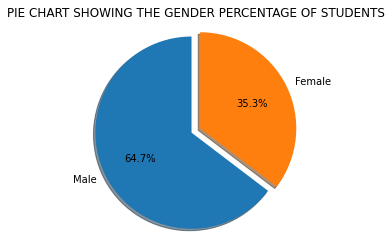

In [17]:
labels = 'Male', 'Female'
sizes = [139, 76]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("PIE CHART SHOWING THE GENDER PERCENTAGE OF STUDENTS")
plt.show()

In [30]:
print("NUMBERS BY STATUS")
pment['status'].value_counts()

NUMBERS BY STATUS


Placed        148
Not Placed     67
Name: status, dtype: int64

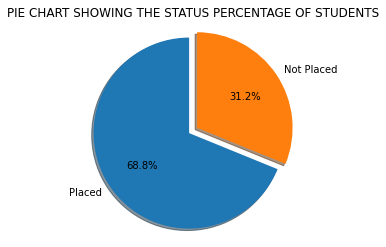

In [19]:
labels = 'Placed', 'Not Placed'
sizes = [148, 67]
explode = (0, 0.1)

fig1,ax2 = plt.subplots()
ax2.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax2.axis('equal')
plt.title("PIE CHART SHOWING THE STATUS PERCENTAGE OF STUDENTS")
plt.show()

In [31]:
print("NUMBERS BY SPECIALISATION IN HIGHER SECONDARY SCHOOL")
pment['hsc_s'].value_counts()

NUMBERS BY SPECIALISATION IN HIGHER SECONDARY SCHOOL


Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

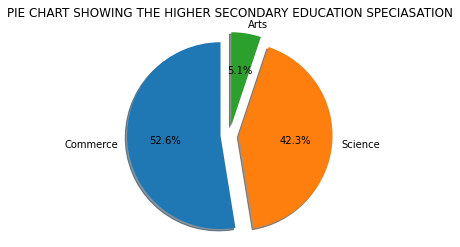

In [33]:
labels = 'Commerce', 'Science', 'Arts'
sizes = [113, 91, 11]
explode = (0.1, 0.1, 0.1)
fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax3.axis('equal')
plt.title("PIE CHART SHOWING THE HIGHER SECONDARY EDUCATION SPECIASATION")
plt.show()

In [34]:
print("NUMBERS BY UNIVERSITY DEGREE")
pment['degree_t'].value_counts()

NUMBERS BY UNIVERSITY DEGREE


Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

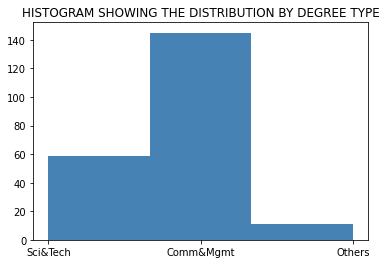

In [23]:
plt.figure()
data = pment['degree_t']
bins = (len(pment['degree_t'].unique()))
plt.hist(data, bins = bins, color = 'steelblue')
plt.title("HISTOGRAM SHOWING THE DISTRIBUTION BY DEGREE TYPE")

plt.show()


In [35]:
print("nUMBERS BY DEGREE SPECIALISATION")
pment['specialisation'].value_counts()

nUMBERS BY DEGREE SPECIALISATION


Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

(-1.1155049387805371, 1.228834828227341, -1.1032797759606114, 1.1242894055891)

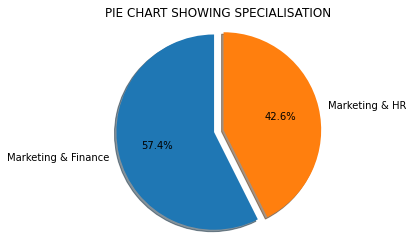

In [38]:
labels = 'Marketing & Finance', 'Marketing & HR'
sizes = [128, 95]
explode = (0, 0.1)

fig4, ax4 = plt.subplots()
ax4.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title("PIE CHART SHOWING SPECIALISATION ")
ax4.axis('equal')

In [40]:

workex_grp = pment.groupby(['workex'], as_index = False)['salary'].mean()
workex_grp.rename(columns = {'workex': 'Work experience', 'salary': 'Average salary'}, inplace = True)
workex_grp

,Work experience,Average salary
0,No,165333.333333
1,Yes,262283.783784


In [42]:
gender_grp = pment.groupby(['gender'], as_index = False)['salary'].mean()
gender_grp.rename(columns = {'salary': 'Average salary', 'gender': 'Gender'}, inplace = True)
gender_grp

,Gender,Average salary
0,F,168815.789474
1,M,215043.165468


In [44]:
spec_grp = pment.groupby(['specialisation'], as_index = False)['salary'].mean()
spec_grp.rename(columns = {'specialisation': 'Specialisation', 'salary': 'Average salary'}, inplace = True)
spec_grp

,Specialisation,Average salary
0,Mkt&Fin,236591.666667
1,Mkt&HR,150842.105263


# **THANK YOU FOR VIEWING MY PROJECT!!!**